## 1. BUSINESS UNDERSTANDING.
***
The aim of this project is to create a machine learning solution to predict the crop yield per acre of rice crops in India.
India is a nation with a high population density, most of whom are small scale farmers that relly on agriculture as a source of income and as a source of food as well. It is thus crucial for the government of India to help small scale farmers maximize their potential when it comes to food production. 
The agriculture sector in India is vast and diverse, with millions of farmers relying on it for their livelihoods. Accurate crop yield estimation can help in:

* Ensuring food security for the country's growing population.
* Efficiently managing resources, such as water, fertilizers, and pesticides.
* Enabling informed policy decisions related to agriculture.
* Mitigating the impact of climate change on crop production.
* Enhancing the income and living standards of farmers.



## Problem Statement.
The problem at hand is to develop predictive models for crop yield estimation in India that can provide accurate and timely forecasts, considering the diverse geographical, climatic, and agronomic factors. Accurate crop yield estimation is essential for farmers, policymakers, and the agricultural sector. It helps in making informed decisions regarding planting, resource allocation, and food distribution. This project aims to address the challenge of predicting rice crop yields based on multiple factors, including fertilizer usage, seedling quantity, land preparation methods, and irrigation techniques.


## Objective.
* The primary objective of this project is to create a reliable model that can predict rice yields accurately. This predictive capability can assist farmers in making informed decisions about crop management, resource allocation, and overall planning.

Other objectives include:
-	To collect historical data on rice production.
-	To Train and finetune the selected model.
-   To evaluate performance of the model.
-	To develop a machine learning model to predict rice yields.
-	To perform comparative analysis with other similar existing models.

***
## 2. DATA UNDERSTANDING

### Data sources
The data-set has been downloaded from zindi and was collected through a survey conducted across multiple districts in India. It consists of a variety of factors that could potentially impact the yield of rice crops. These factors include things like the type and amount of fertilizers used, the quantity of seedlings planted, methods of preparing the land, different irrigation techniques employed, among other features. The dataset comprises more than 5000 data points, each having more than 40 features.

### Data size
The dataset is divided into three: Train contains the target. This is the dataset that we will use to train our models. Test resembles Train.csv but without the target-related columns. This is the dataset on which you will apply your model to. The variable dataset has variables found in train and test.

***

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bavin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading the data

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

Getting the shape of the data.
Data has been divided into two, Training and Testing data

In [3]:
#Getting the shape of the data
print(train.shape)
print(test.shape)

(3870, 44)
(1290, 43)


The train data set has 3870 rows and 44 columns

The test data set has 1290 rows and 43 columns

Checking the column that is in train data but missing in the test data

In [4]:
#Columns of both datasets
train_columns = set(train.columns)
test_columns= set(test.columns)
set.difference(train_columns,test_columns)

{'Yield'}

The yield is the one missing in the dataset
- Since the target variable is yield, it being missing in the test dataset is to prevent unintentional data leakage to ensure model evaluation is unbiased and reflect real world scenarios where yield is not known in advance.

Getting the data


In [5]:
#Getting the first five rows of the train data
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [6]:
#Getting the last 5 rows of the train data
train.tail()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
3865,ID_7ZZQ6R4XB4FK,Nalanda,Rajgir,28,28,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-02,6,LineSowingAfterTillage,2022-06-29,...,machine,2022-11-29,NaN,2022-12-14,machine,25,40,plowed_in_soil,0.375000,720
3866,ID_PVVDF6LK6FO8,Vaishali,Mahua,5,5,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-06,5,Manual_PuddledRandom,2022-07-08,...,hand,2022-10-10,4.0,2022-11-05,hand,30,10,plowed_in_soil,0.136364,250
3867,ID_RBYVUPRATVMW,Nalanda,Noorsarai,50,45,TractorPlough,2022-07-07,5,Manual_PuddledRandom,2022-06-15,...,hand,2022-10-20,1200.0,2022-10-30,hand,25,10,plowed_in_soil,0.375000,600
3868,ID_ARE9QWENJNJ2,Jamui,Khaira,20,20,TractorPlough,2022-07-12,3,Manual_PuddledRandom,2022-06-28,...,hand,2022-11-09,100.0,2022-12-10,hand,25,10,plowed_in_soil,0.227273,400
3869,ID_KEPOQDTCZC6S,Jamui,Jamui,4,4,TractorPlough,2022-07-24,4,Manual_PuddledRandom,2022-06-25,...,hand,2022-11-17,300.0,2022-12-29,machine,27,10,plowed_in_soil,0.136364,238


In [7]:
#Getting unique elements in District columns
train.District.unique()

array(['Nalanda', 'Gaya', 'Vaishali', 'Jamui'], dtype=object)

- This shows that there are four Districts where Rice farming is mainly practised in  India that is: Nalanda, Gaya, Vaishali and Jamui.

In [8]:
#getting the unique block where farming is done
train.Block.unique()

array(['Noorsarai', 'Rajgir', 'Gurua', 'Garoul', 'Khaira', 'Jamui',
       'Mahua', 'Chehrakala', 'Wazirganj'], dtype=object)

In [9]:
#finding the number of blocks
len(train.Block.unique())

9

There are a total of 9 blocks where rice Farming is done in different districts


Each district and blocks it contains

In [10]:
# a district to store the mapping
district_to_block ={}

#Iterating through each row of the DataFrame
for index, row in train.iterrows():
    district = row['District']
    block = row['Block']
    if district in district_to_block:
        district_to_block[district].add(block)
    else:
        district_to_block[district]={block}
print(district_to_block)

{'Nalanda': {'Rajgir', 'Noorsarai'}, 'Gaya': {'Gurua', 'Wazirganj'}, 'Vaishali': {'Mahua', 'Garoul', 'Chehrakala'}, 'Jamui': {'Gurua', 'Jamui', 'Khaira'}}


In [11]:
df = pd.DataFrame(list(district_to_block.items()), columns=['District','Blocks'])
print(df)

   District                       Blocks
0   Nalanda          {Rajgir, Noorsarai}
1      Gaya           {Gurua, Wazirganj}
2  Vaishali  {Mahua, Garoul, Chehrakala}
3     Jamui       {Gurua, Jamui, Khaira}


Nalanda and Gaya Districts have two blocks each and Vaishali and Jamui have three blocks each.


 Comparing Cultivated land and crop Cultivated land

In [12]:
cult_land_mean = train['CultLand'].mean()
crop_cult_land_mean = train['CropCultLand'].mean()

cult_land_median = train['CultLand'].median()
crop_cult_land_median = train['CropCultLand'].median()

#compare means and medians
print("Cultland Mean:", round(cult_land_mean,3))
print("CropCultland Mean:", round(crop_cult_land_mean,3))
print("Cultland Median:", cult_land_median)
print("CropCultland Median:", crop_cult_land_median)




Cultland Mean: 28.528
CropCultland Mean: 24.727
Cultland Median: 20.0
CropCultland Median: 20.0


While comparing the cultivatedland and the crop cultivated land there is a disparity indicating not all the land that is cultivated that rice is planted.

Methods used in harvesting and threshing

In [13]:
print(f"Harvesting {train.Harv_method.unique()}")
print(f"Threshing {train.Threshing_method.unique()}")

Harvesting ['machine' 'hand']
Threshing ['machine' 'hand']


In [14]:
train.Harv_method.value_counts(normalize=True)

Harv_method
hand       0.941085
machine    0.058915
Name: proportion, dtype: float64

In [15]:
train.Threshing_method.value_counts(normalize=True)

Threshing_method
machine    0.542119
hand       0.457881
Name: proportion, dtype: float64

During Harvesting farmers use hands mostly while during threshing most farmers prefer machine.
- When harvesting 94% of the farmers use hands compared to only 6% who use machine.
- During threshing there is almost even use of machine and hands having 54% and 46% respectively

Land preparation methods

In [16]:
methods = np.array(train.LandPreparationMethod)

tokenized_array = [word_tokenize(text) for text in methods]

unique_tokens_set = set()

for tokens in tokenized_array:
    unique_tokens_set.update(tokens)

print(unique_tokens_set)

{'FourWheelTracRotavator', 'Other', 'BullockPlough', 'WetTillagePuddling', 'TractorPlough'}


Farmers use the following methods to prepare land: FourwheeltracRotavator, TractorPlough , BullockPlough, WetTillagePuddling and others. This indicate farmers use both traditional ways of land preparation ie BullockPlough and modernised by use of machines

# 3. Data Preprocessing


# Data Cleaning

In [17]:
#Checking For duplicate rows in Train ID column
train['ID'].duplicated().sum()

0

In [18]:
#Checking for duplicate rows in Test ID column
test['ID'].duplicated().sum()

0

In [19]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [20]:
#checking for missing values
train.isna().sum().sort_values(ascending=False)

2appDaysUrea                          2700
2tdUrea                               2694
CropOrgFYM                            2674
Ganaura                               2417
BasalUrea                             1704
PCropSolidOrgFertAppMethod            1337
OrgFertilizers                        1335
TransIrriCost                          882
1tdUrea                                556
1appDaysUrea                           556
BasalDAP                               543
TransplantingIrrigationPowerSource     503
FirstTopDressFert                      485
MineralFertAppMethod.1                 481
NursDetFactor                          289
TransDetFactor                         289
SeedlingsPerPit                        289
Harv_hand_rent                         252
StandingWater                          238
TransplantingIrrigationHours           193
CropbasalFerts                         188
TransplantingIrrigationSource          115
RcNursEstDate                           83
Residue_per

In [21]:
train['PCropSolidOrgFertAppMethod'].value_counts()

PCropSolidOrgFertAppMethod
SoilApplied        1680
Broadcasting        841
RootApplication       9
Spray                 3
Name: count, dtype: int64


I replaced the '2tdUrea and 1tdUrea' columns missing values with 0 because urea was not applied to the crop in the third dose. - amount of urea applied in the third application.

Some farmers applied both the fertilizers (basalDAP and basalUrea) while others only applied one. Hence we assume they never applied and replace them with zero.	

I replaced NaN in Ganaura and GanauraFYM with zero.

I replaced Harv_hand_rent NaN with zero because the farmers used machines instead

In [22]:
# Filling missing values in specific columns with 0
train["BasalDAP"]= train["BasalDAP"].fillna(0)
train['BasalUrea']= train["BasalUrea"].fillna(0)
train['1tdUrea']= train['1tdUrea'].fillna(0)
train['2tdUrea']= train['2tdUrea'].fillna(0)
train['CropOrgFYM']= train['CropOrgFYM'].fillna(0)
train['Ganaura']= train['Ganaura'].fillna(0)
train['Harv_hand_rent']= train['Harv_hand_rent'].fillna(0)

In [23]:
train.isna().sum().sort_values(ascending = False)

2appDaysUrea                          2700
PCropSolidOrgFertAppMethod            1337
OrgFertilizers                        1335
TransIrriCost                          882
1appDaysUrea                           556
TransplantingIrrigationPowerSource     503
FirstTopDressFert                      485
MineralFertAppMethod.1                 481
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
StandingWater                          238
TransplantingIrrigationHours           193
CropbasalFerts                         188
TransplantingIrrigationSource          115
RcNursEstDate                           83
Harv_date                                0
Harv_hand_rent                           0
Threshing_date                           0
Threshing_method                         0
Residue_length                           0
Harv_method                              0
Residue_perc                             0
Stubble_use

I dropped OrgFertilizers column since it explains the type of fertilizer a farmer used and there exists a column that specifies if Ganaura or GanauraFYM used. 

Hence, justification for dropping 2appDaysUrea and 1appDaysUrea columns.

I also dropped the RcNursEstaDate because it has inconsistent dates.

- Feature selection


In [24]:
train.drop(columns = ['1appDaysUrea', '2appDaysUrea', 'OrgFertilizers', 'RcNursEstDate', 'ID'], axis=1, inplace= True)

In [25]:
train.head()

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,SeedingSowingTransplanting,SeedlingsPerPit,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-07-21,2.0,...,machine,2022-11-16,0.0,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-07-20,2.0,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-08-13,2.0,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-07-17,2.0,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-07-20,2.0,...,machine,2022-11-30,0.0,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


We have only two type of organic manure[CropOrgFYM ,Ganaura ], Where none of them was used we have a missing value in PCropSolidOrgFertAppMethod column we have a missing element so we will replace with "notused"

In [26]:
train[['PCropSolidOrgFertAppMethod',"Ganaura","CropOrgFYM"]]

,PCropSolidOrgFertAppMethod,Ganaura,CropOrgFYM
0,NaN,0.0,0.0
1,NaN,0.0,0.0
2,SoilApplied,1.0,1.0
3,SoilApplied,1.0,0.0
4,NaN,0.0,0.0
...,...,...,...
3865,SoilApplied,1.0,0.0
3866,NaN,0.0,0.0
3867,Broadcasting,1.0,0.0
3868,NaN,0.0,0.0


In [27]:
# replacing the NAN with notused
train["PCropSolidOrgFertAppMethod"] = train["PCropSolidOrgFertAppMethod"].fillna("notused")

In [28]:
#viewing the rest of the column with the missing data
train[["PCropSolidOrgFertAppMethod","TransIrriCost","TransplantingIrrigationPowerSource","FirstTopDressFert",
    "MineralFertAppMethod.1", "SeedlingsPerPit","NursDetFactor","TransDetFactor","StandingWater","TransplantingIrrigationHours",  
    "CropbasalFerts","TransplantingIrrigationSource" ]]

,PCropSolidOrgFertAppMethod,TransIrriCost,TransplantingIrrigationPowerSource,FirstTopDressFert,MineralFertAppMethod.1,SeedlingsPerPit,NursDetFactor,TransDetFactor,StandingWater,TransplantingIrrigationHours,CropbasalFerts,TransplantingIrrigationSource
0,notused,200.0,Electric,Urea,Broadcasting,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,2.0,5.0,Urea,Boring
1,notused,125.0,Electric,Urea,Broadcasting,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,3.0,5.0,DAP Urea,Boring
2,SoilApplied,80.0,Electric,Urea,RootApplication,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,2.0,4.0,DAP,Boring
3,SoilApplied,NaN,NaN,Urea,Broadcasting,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,DAP Urea,NaN
4,notused,300.0,Electric,Urea,Broadcasting,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,2.0,9.0,Urea DAP,Boring
...,...,...,...,...,...,...,...,...,...,...,...,...
3865,SoilApplied,360.0,Electric,Urea,Broadcasting,NaN,NaN,NaN,5.0,7.0,DAP Urea,Boring
3866,notused,NaN,Diesel,Urea,Broadcasting,1.0,IrrigWaterAvailability LabourAvailability,IrrigWaterAvailability LaborAvailability,3.0,3.0,DAP,Boring
3867,Broadcasting,120.0,Electric,NaN,NaN,1.0,CalendarDate IrrigWaterAvailability,CalendarDate IrrigWaterAvailability,5.0,6.0,Urea,Boring
3868,notused,NaN,NaN,NaN,NaN,4.0,SeedAvailability IrrigWaterAvailability,IrrigWaterAvailability RainArrival SeedlingAge,9.0,2.0,DAP Urea,Canal


Replacing the rest of the missing value with their respective mode to their column

In [29]:
#replacing the numerical columns with mode
train['StandingWater'] = train['StandingWater'].fillna(train['StandingWater'].mode().iloc[0])
train['SeedlingsPerPit'] = train['SeedlingsPerPit'].fillna(train['SeedlingsPerPit'].mode().iloc[0])
train['TransplantingIrrigationHours'] = train['TransplantingIrrigationHours'].fillna(train['TransplantingIrrigationHours'].mode().iloc[0])
train['TransIrriCost'] = train['TransIrriCost'].fillna(train['TransIrriCost'].mode().iloc[0])

In [30]:
#replacing the categorical column with the most common element
train["TransplantingIrrigationPowerSource"] = train['TransplantingIrrigationPowerSource'].fillna(train['TransplantingIrrigationPowerSource'].mode().iloc[0])
train['FirstTopDressFert'] = train['FirstTopDressFert'].fillna(train['FirstTopDressFert'].mode().iloc[0])
train['MineralFertAppMethod.1'] = train['MineralFertAppMethod.1'].fillna(train['MineralFertAppMethod.1'].mode().iloc[0])
train['TransDetFactor'] = train['TransDetFactor'].fillna(train['TransDetFactor'].mode().iloc[0])
train['NursDetFactor'] = train['NursDetFactor'].fillna(train['NursDetFactor'].mode().iloc[0])
train['CropbasalFerts'] = train['CropbasalFerts'].fillna(train['CropbasalFerts'].mode().iloc[0])
train['TransplantingIrrigationSource'] = train['TransplantingIrrigationSource'].fillna(train['TransplantingIrrigationSource'].mode().iloc[0])


Checking for missing values

In [31]:
train.isna().sum().sort_values(ascending = False)

District                              0
Harv_method                           0
BasalDAP                              0
BasalUrea                             0
MineralFertAppMethod                  0
FirstTopDressFert                     0
1tdUrea                               0
2tdUrea                               0
MineralFertAppMethod.1                0
Harv_date                             0
NoFertilizerAppln                     0
Harv_hand_rent                        0
Threshing_date                        0
Threshing_method                      0
Residue_length                        0
Residue_perc                          0
Stubble_use                           0
Acre                                  0
CropbasalFerts                        0
PCropSolidOrgFertAppMethod            0
Block                                 0
SeedlingsPerPit                       0
CultLand                              0
CropCultLand                          0
LandPreparationMethod                 0


# Exploratory Data Analysis

Here we analyse the relationship between the numeric features and the target column, Yield

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   District                            3870 non-null   object 
 1   Block                               3870 non-null   object 
 2   CultLand                            3870 non-null   int64  
 3   CropCultLand                        3870 non-null   int64  
 4   LandPreparationMethod               3870 non-null   object 
 5   CropTillageDate                     3870 non-null   object 
 6   CropTillageDepth                    3870 non-null   int64  
 7   CropEstMethod                       3870 non-null   object 
 8   SeedingSowingTransplanting          3870 non-null   object 
 9   SeedlingsPerPit                     3870 non-null   float64
 10  NursDetFactor                       3870 non-null   object 
 11  TransDetFactor                      3870 no

This indicates that there are no missing values in the columns

Understanding the central tendency, spread, and shape of the distribution for each numeric variable in the dataset.

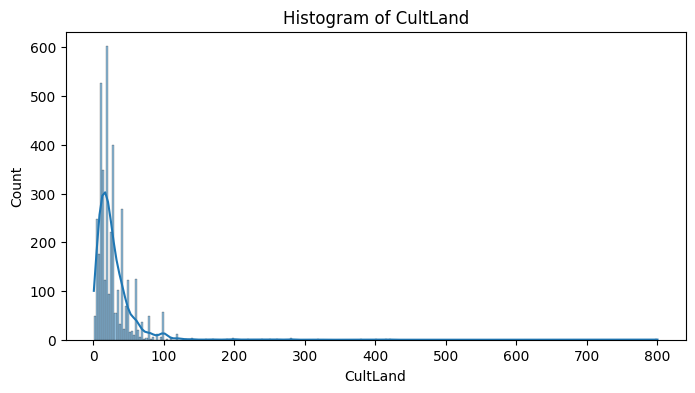

Description of CultLand:
count    3870.000000
mean       28.527907
std        30.454218
min         1.000000
25%        12.000000
50%        20.000000
75%        35.000000
max       800.000000
Name: CultLand, dtype: float64



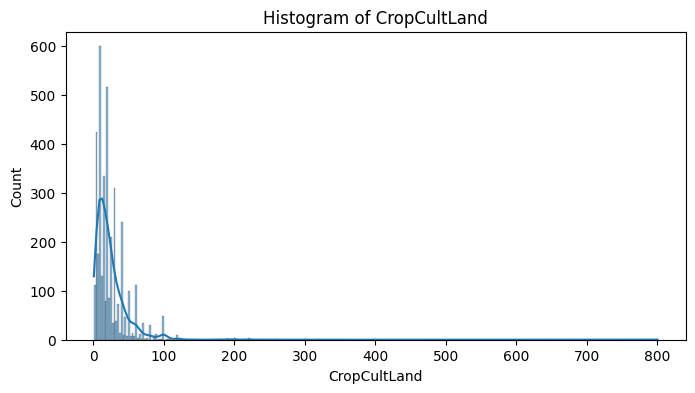

Description of CropCultLand:
count    3870.000000
mean       24.727132
std        27.994802
min         1.000000
25%        10.000000
50%        20.000000
75%        30.000000
max       800.000000
Name: CropCultLand, dtype: float64



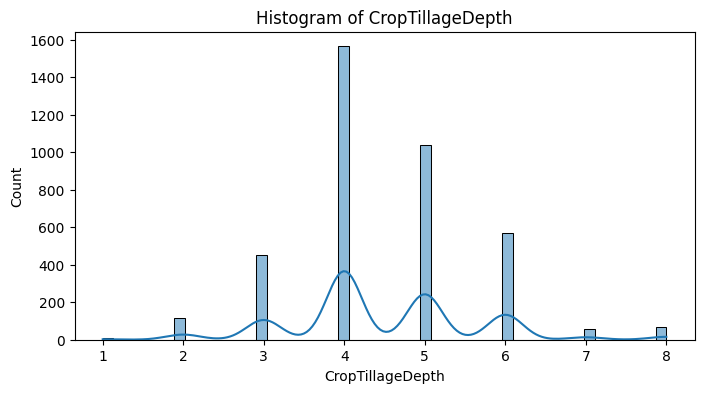

Description of CropTillageDepth:
count    3870.000000
mean        4.488372
std         1.133044
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: CropTillageDepth, dtype: float64



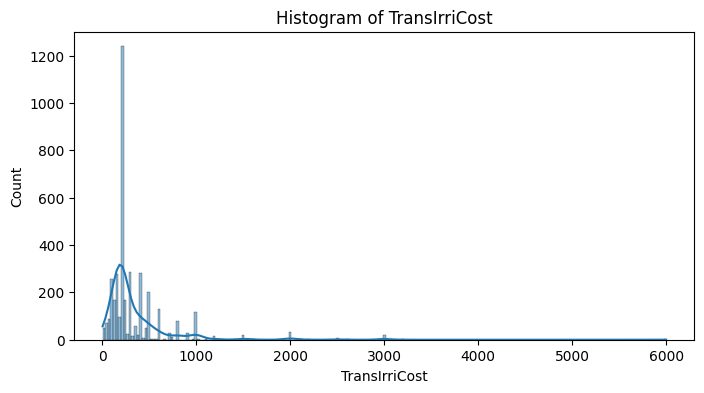

Description of TransIrriCost:
count    3870.000000
mean      338.765891
std       376.422445
min         1.000000
25%       180.000000
50%       200.000000
75%       400.000000
max      6000.000000
Name: TransIrriCost, dtype: float64



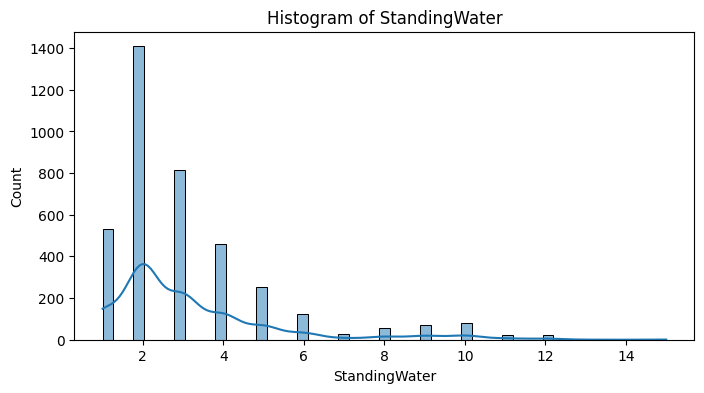

Description of StandingWater:
count    3870.000000
mean        3.170801
std         2.159216
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        15.000000
Name: StandingWater, dtype: float64



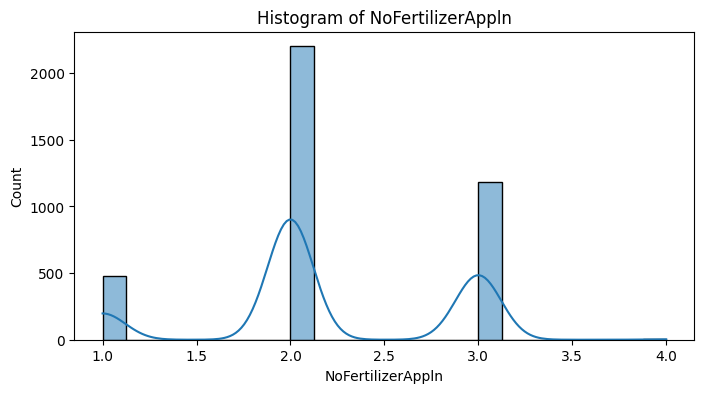

Description of NoFertilizerAppln:
count    3870.000000
mean        2.184496
std         0.634632
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: NoFertilizerAppln, dtype: float64



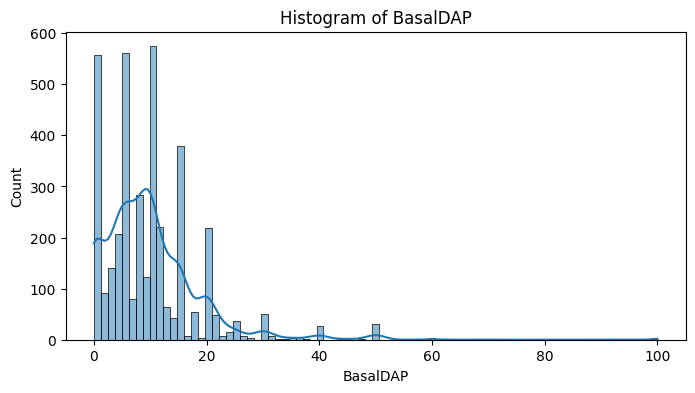

Description of BasalDAP:
count    3870.000000
mean        9.845478
std         8.763596
min         0.000000
25%         4.000000
50%         9.000000
75%        13.750000
max       100.000000
Name: BasalDAP, dtype: float64



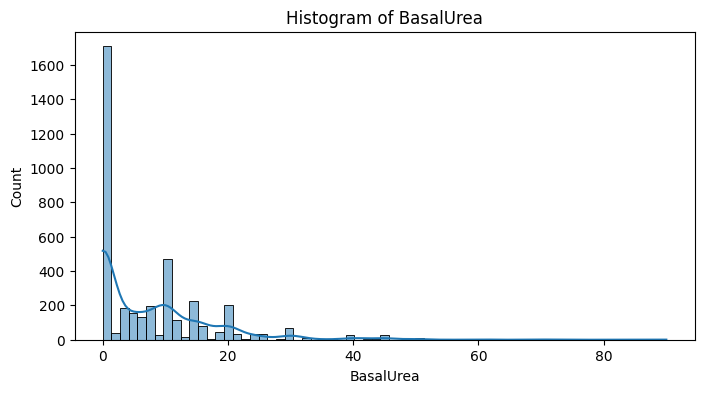

Description of BasalUrea:
count    3870.000000
mean        7.472868
std         9.829125
min         0.000000
25%         0.000000
50%         5.000000
75%        11.000000
max        90.000000
Name: BasalUrea, dtype: float64



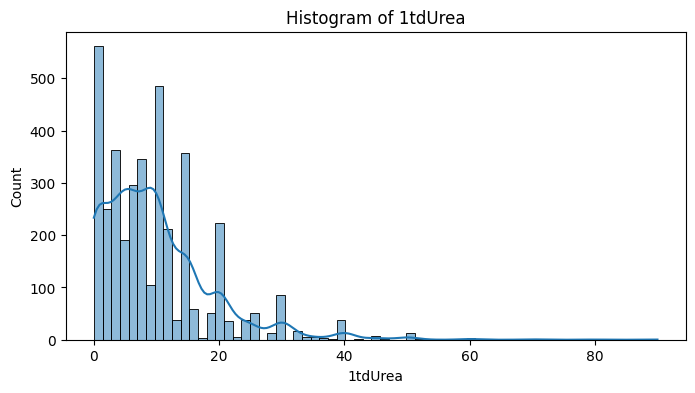

Description of 1tdUrea:
count    3870.000000
mean        9.859690
std         9.020164
min         0.000000
25%         4.000000
50%         8.000000
75%        15.000000
max        90.000000
Name: 1tdUrea, dtype: float64



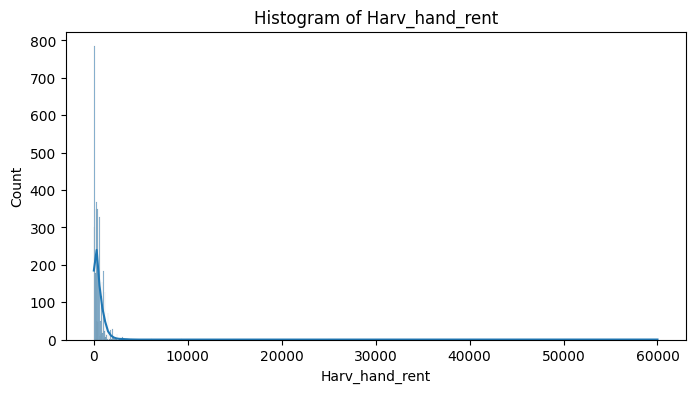

Description of Harv_hand_rent:
count     3870.000000
mean       501.679587
std       1108.843917
min          0.000000
25%        120.000000
50%        300.000000
75%        600.000000
max      60000.000000
Name: Harv_hand_rent, dtype: float64



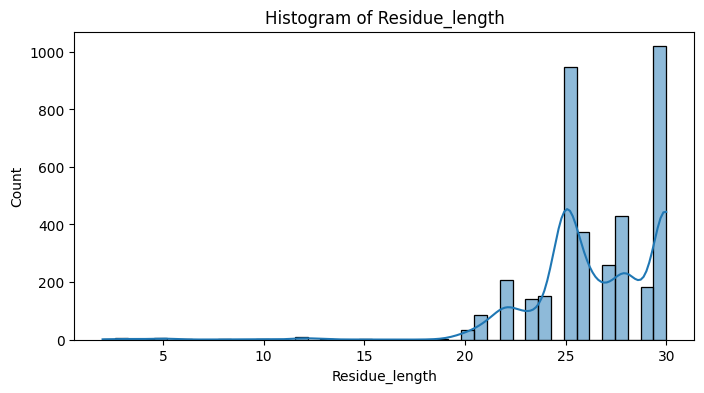

Description of Residue_length:
count    3870.000000
mean       26.517829
std         3.192873
min         2.000000
25%        25.000000
50%        26.000000
75%        30.000000
max        30.000000
Name: Residue_length, dtype: float64



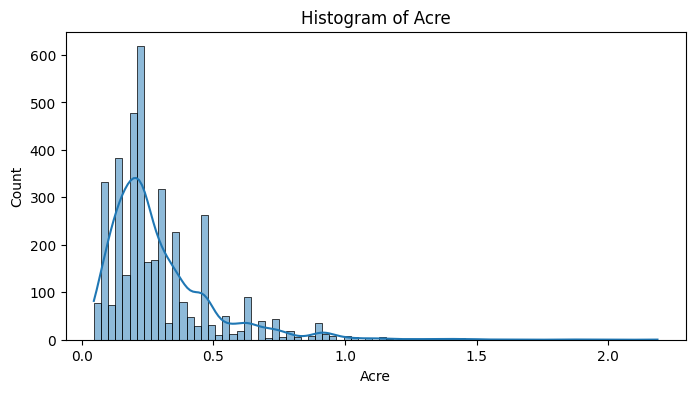

Description of Acre:
count    3870.000000
mean        0.292826
std         0.206918
min         0.045455
25%         0.156250
50%         0.227273
75%         0.370370
max         2.187500
Name: Acre, dtype: float64



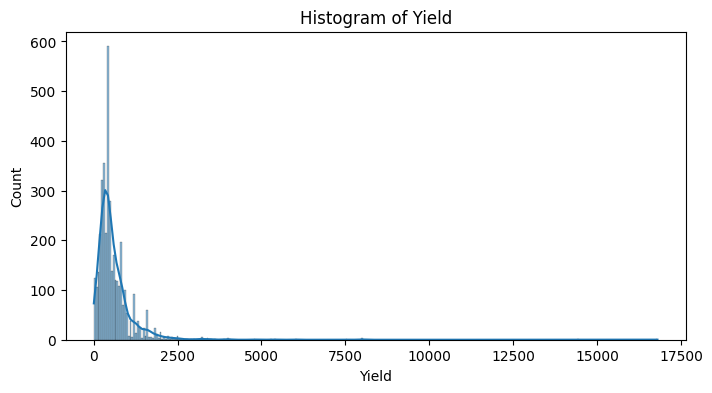

Description of Yield:
count     3870.000000
mean       594.269251
std        651.916953
min          4.000000
25%        300.000000
50%        425.000000
75%        740.000000
max      16800.000000
Name: Yield, dtype: float64



In [33]:
# Specify columns to exclude from the numeric columns
exclude_columns = ['SeedlingsPerPit', 'TransplantingIrrigationHours', 'Ganaura', 'CropOrgFYM', '2tdUrea', 'Residue_perc']

#numeric columns excluding the specified ones
numeric_columns = [col for col in train.select_dtypes(include='number').columns if col not in exclude_columns]

# Generate histograms for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Generate a description for the visualization
    description = train[col].describe()
    print(f"Description of {col}:")
    print(description)
    print()


Visualisations for categorical columns

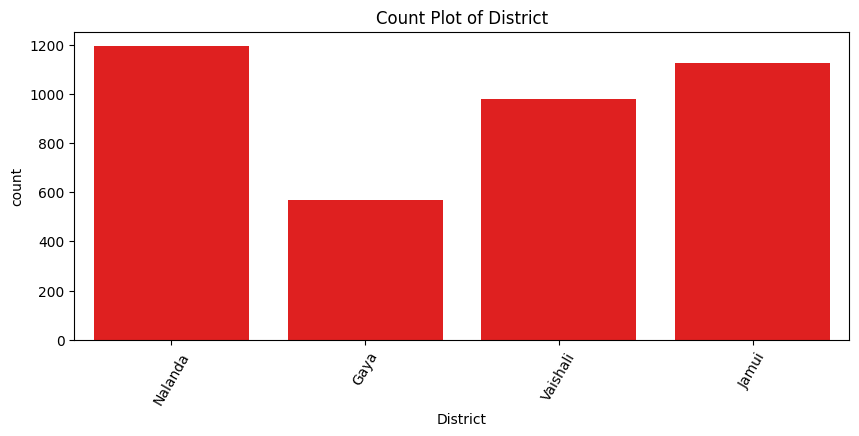

Description of District:
District
Nalanda     1193
Jamui       1127
Vaishali     980
Gaya         570
Name: count, dtype: int64



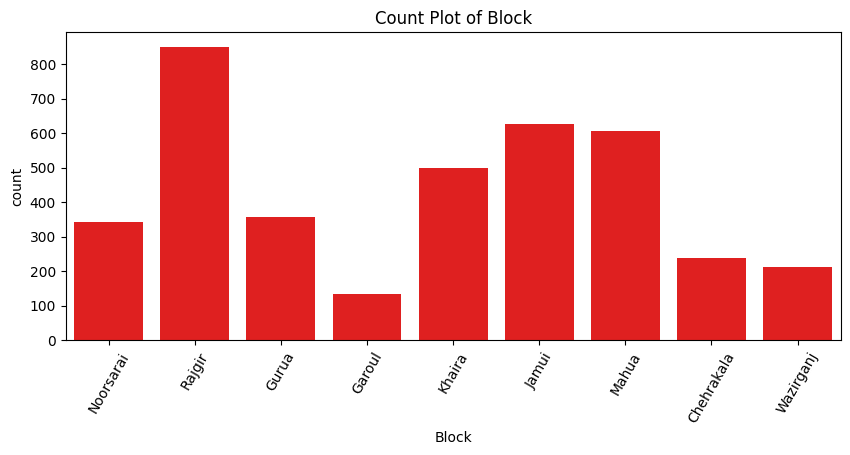

Description of Block:
Block
Rajgir        850
Jamui         626
Mahua         607
Khaira        500
Gurua         358
Noorsarai     343
Chehrakala    239
Wazirganj     213
Garoul        134
Name: count, dtype: int64



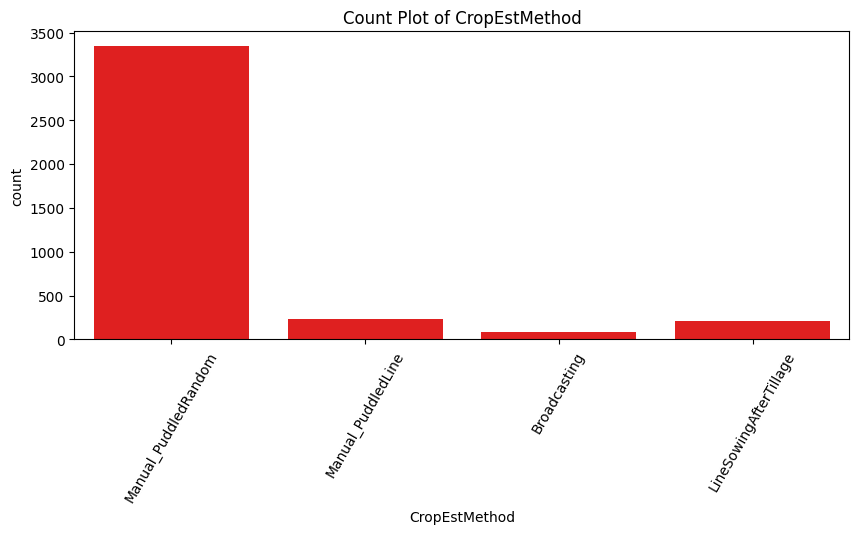

Description of CropEstMethod:
CropEstMethod
Manual_PuddledRandom      3346
Manual_PuddledLine         235
LineSowingAfterTillage     206
Broadcasting                83
Name: count, dtype: int64



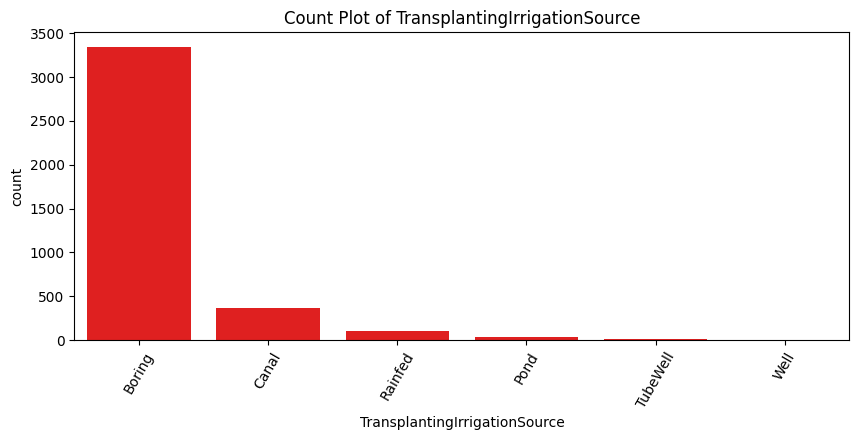

Description of TransplantingIrrigationSource:
TransplantingIrrigationSource
Boring      3343
Canal        373
Rainfed      103
Pond          36
TubeWell      12
Well           3
Name: count, dtype: int64



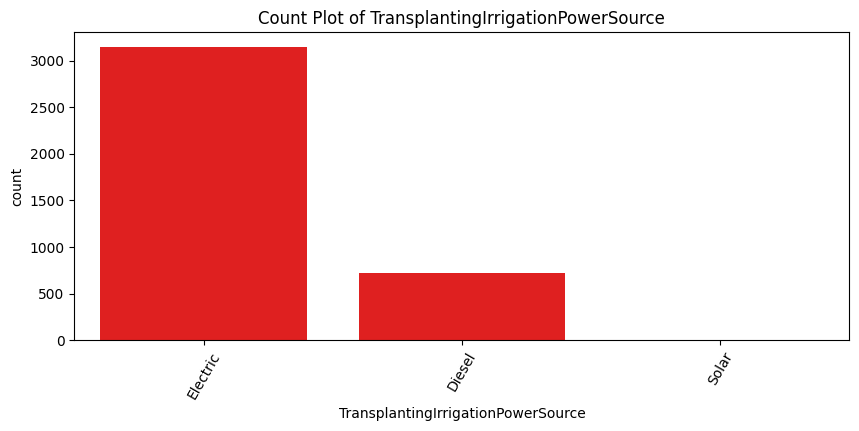

Description of TransplantingIrrigationPowerSource:
TransplantingIrrigationPowerSource
Electric    3148
Diesel       720
Solar          2
Name: count, dtype: int64



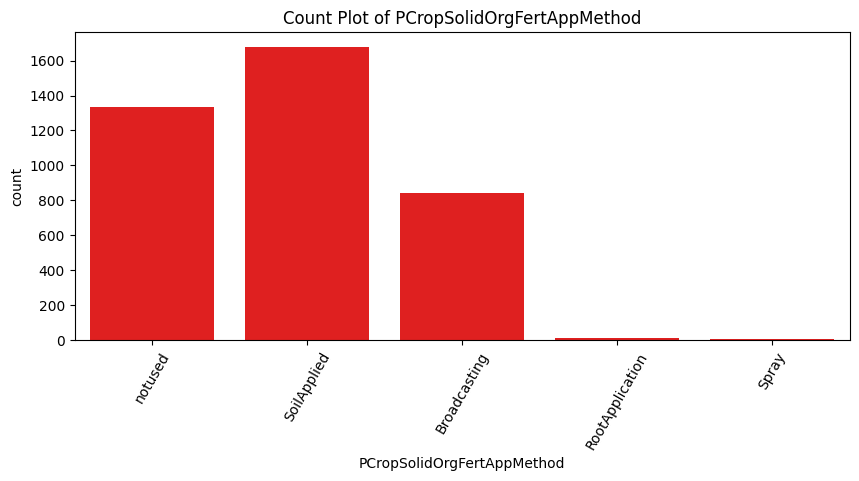

Description of PCropSolidOrgFertAppMethod:
PCropSolidOrgFertAppMethod
SoilApplied        1680
notused            1337
Broadcasting        841
RootApplication       9
Spray                 3
Name: count, dtype: int64



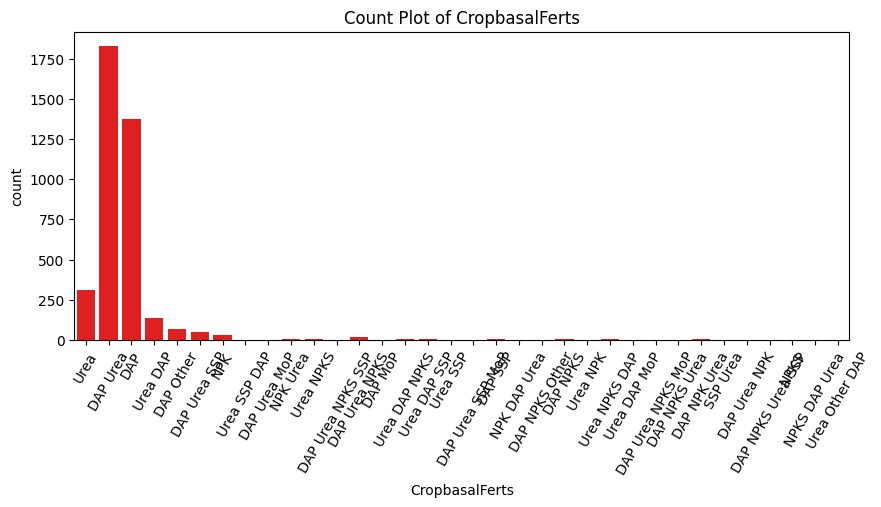

Description of CropbasalFerts:
CropbasalFerts
DAP Urea             1828
DAP                  1379
Urea                  308
Urea DAP              134
DAP Other              70
DAP Urea SSP           51
NPK                    29
DAP Urea NPKS          18
NPK Urea                8
Urea DAP SSP            7
Urea NPKS               6
Urea DAP NPKS           3
DAP SSP                 3
DAP NPKS                3
Urea NPKS DAP           3
DAP NPK Urea            2
NPKS                    1
DAP NPKS Urea SSP       1
Urea DAP MoP            1
DAP Urea NPK            1
SSP Urea                1
NPKS DAP Urea           1
DAP NPKS Urea           1
DAP Urea NPKS MoP       1
DAP Urea SSP MoP        1
Urea NPK                1
DAP NPKS Other          1
NPK DAP Urea            1
Urea SSP                1
DAP MoP                 1
DAP Urea NPKS SSP       1
DAP Urea MoP            1
Urea SSP DAP            1
Urea Other DAP          1
Name: count, dtype: int64



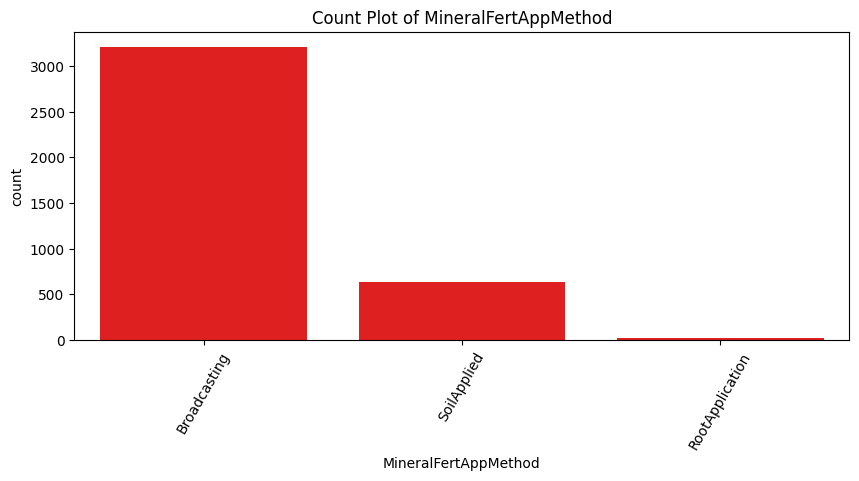

Description of MineralFertAppMethod:
MineralFertAppMethod
Broadcasting       3214
SoilApplied         638
RootApplication      18
Name: count, dtype: int64



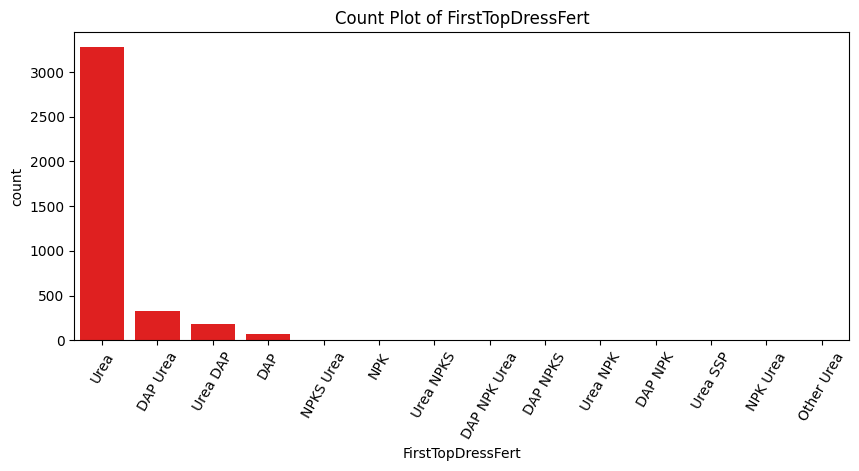

Description of FirstTopDressFert:
FirstTopDressFert
Urea            3283
DAP Urea         322
Urea DAP         177
DAP               64
NPKS Urea          6
Urea NPKS          5
NPK                3
DAP NPKS           3
NPK Urea           2
DAP NPK Urea       1
Urea NPK           1
DAP NPK            1
Urea SSP           1
Other Urea         1
Name: count, dtype: int64



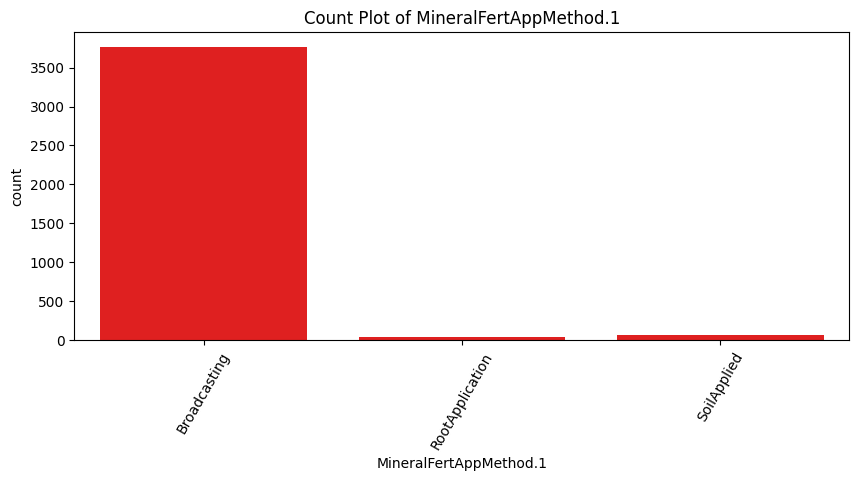

Description of MineralFertAppMethod.1:
MineralFertAppMethod.1
Broadcasting       3769
SoilApplied          64
RootApplication      37
Name: count, dtype: int64



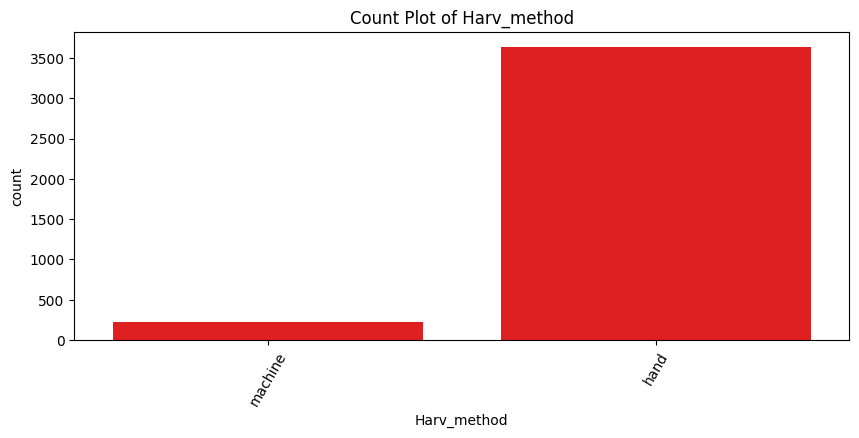

Description of Harv_method:
Harv_method
hand       3642
machine     228
Name: count, dtype: int64



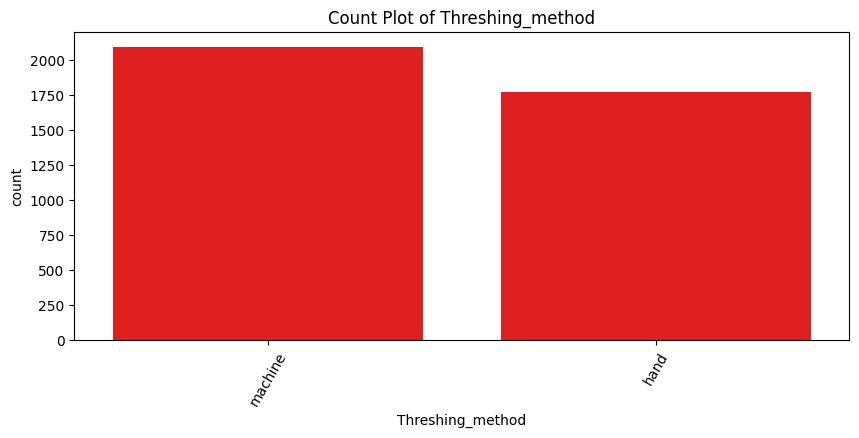

Description of Threshing_method:
Threshing_method
machine    2098
hand       1772
Name: count, dtype: int64



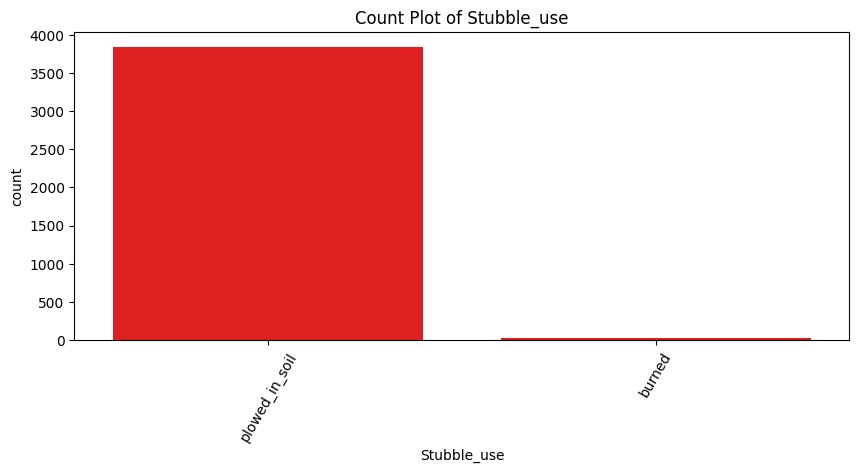

Description of Stubble_use:
Stubble_use
plowed_in_soil    3846
burned              24
Name: count, dtype: int64



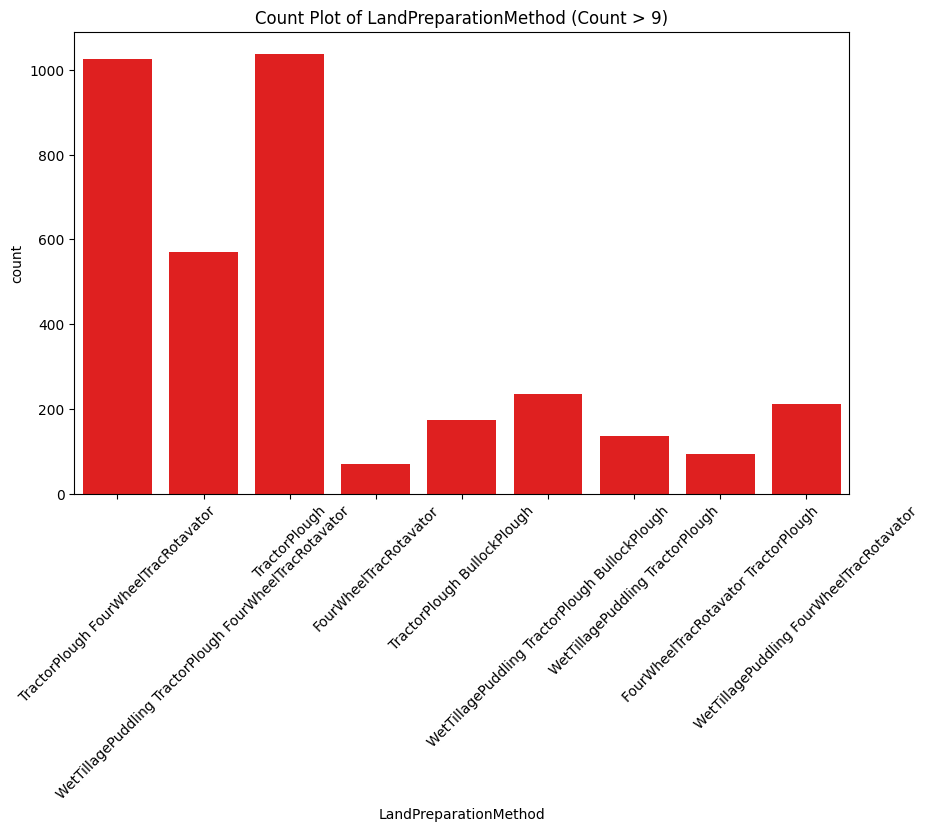

In [34]:

# Categorical Columns
# List of columns to exclude
exclude_columns = ['Threshing_date', 'Harv_date', 'TransDetFactor', 'NursDetFactor', 'SeedingSowingTransplanting', 'CropTillageDate','LandPreparationMethod']

# Filter the categorical columns
categorical_columns = [col for col in train.select_dtypes(include='object').columns if col not in exclude_columns]

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train, x=col, color='red')  # Set the color to red
    plt.xticks(rotation=60)
    plt.title(f'Count Plot of {col}')
    plt.show()

    # Generate a description for the column
    description = train[col].value_counts()
    print(f"Description of {col}:")
    print(description)
    print()

# Count Plot for LandPreparationMethod with count above 9
land_prep_counts = train['LandPreparationMethod'].value_counts()
land_prep_counts = land_prep_counts[land_prep_counts > 50]

plt.figure(figsize=(10, 6))
sns.countplot(data=train[train['LandPreparationMethod'].isin(land_prep_counts.index)], x='LandPreparationMethod', color='red')  # Set the color to red
plt.xticks(rotation=45)
plt.title('Count Plot of LandPreparationMethod (Count > 9)')
plt.show()

Bivariate Visualizations

- This explores the relationship between two variables. 

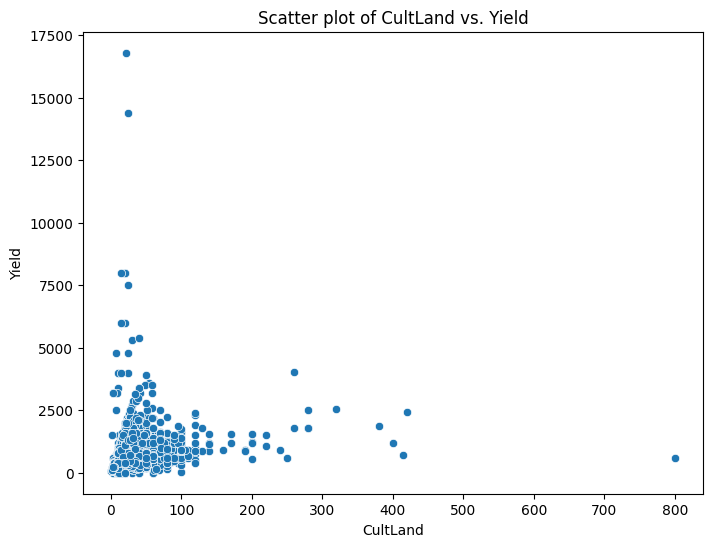

In [35]:
#Bivariate visualizations
# scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=train, x='CultLand', y='Yield')
plt.title('Scatter plot of CultLand vs. Yield')
plt.show()

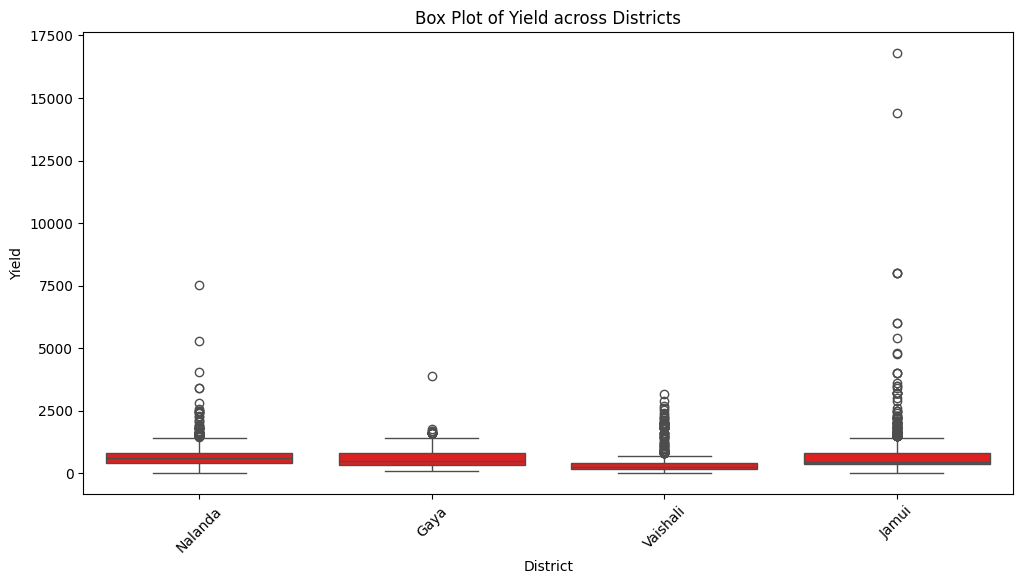

In [36]:
#Box Plot with Categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='District', y='Yield', color="red")
plt.xticks(rotation=45)
plt.title('Box Plot of Yield across Districts')
plt.show()

In [37]:
numeric_cols = ['Yield', 'CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit', 'TransplantingIrrigationHours', 'StandingWater', 'NoFertilizerAppln', 'BasalDAP', 'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre']

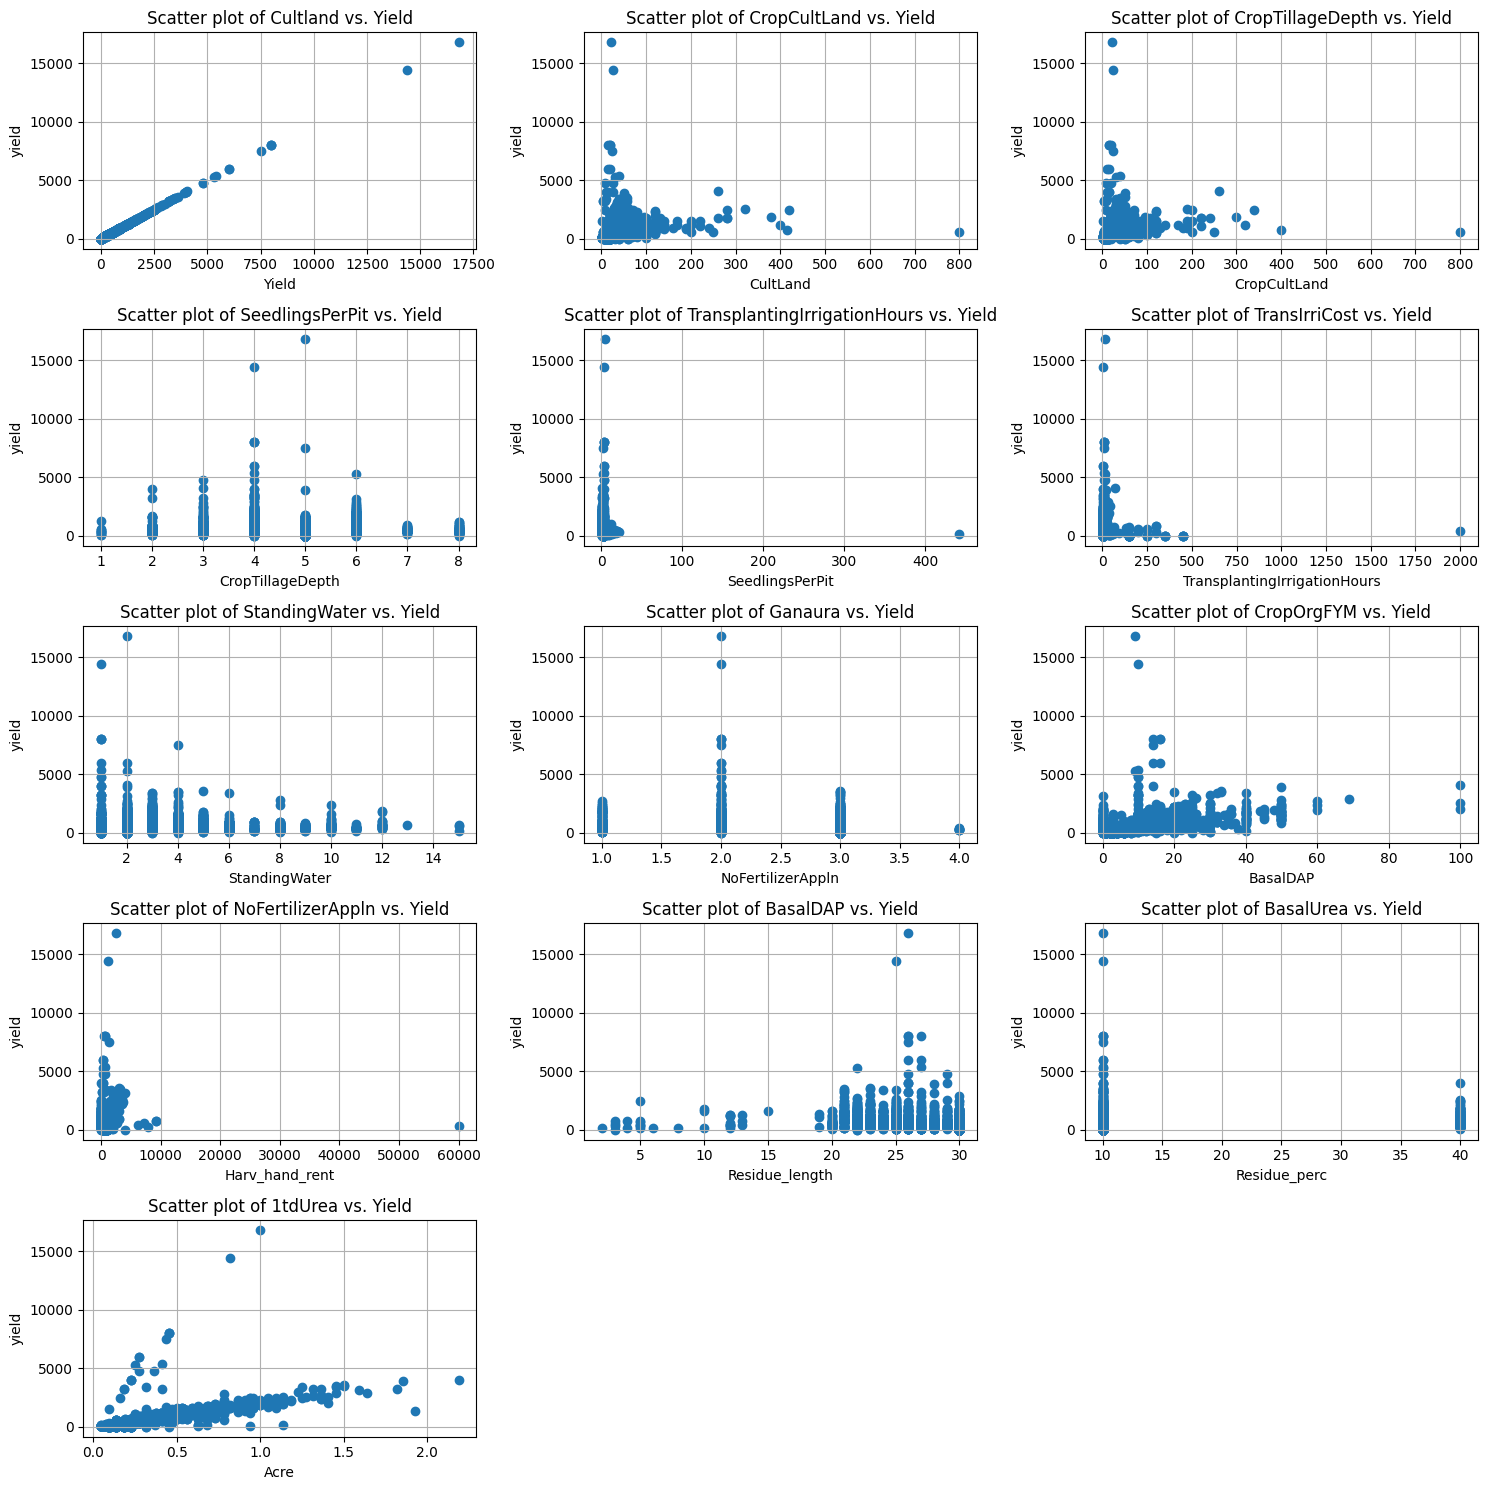

In [38]:
nrows = 5
ncols = 3
total_plots = nrows * ncols
fig, axs = plt.subplots(nrows =nrows, ncols=ncols, figsize=(15, 15))

#Flattening the array of subplots for easy iteration
axs = axs.flatten()

#List of descriptions for each plot
descriptions = [
    "Scatter plot of Cultland vs. Yield",
    "Scatter plot of CropCultLand vs. Yield",
    "Scatter plot of CropTillageDepth vs. Yield",
    "Scatter plot of SeedlingsPerPit vs. Yield",
    "Scatter plot of TransplantingIrrigationHours vs. Yield",
    "Scatter plot of TransIrriCost vs. Yield",
    "Scatter plot of StandingWater vs. Yield",
    "Scatter plot of Ganaura vs. Yield",
    "Scatter plot of CropOrgFYM vs. Yield",
    "Scatter plot of NoFertilizerAppln vs. Yield",
    "Scatter plot of BasalDAP vs. Yield",
    "Scatter plot of BasalUrea vs. Yield",
    "Scatter plot of 1tdUrea vs. Yield",
    "Scatter plot of 2tdUrea vs. Yield",
    "Scatter plot of Harv_hand_rent vs. Yield",
    
]
#numeric column and plot on the corresponding subplot
for i, column in enumerate(numeric_cols[:total_plots]):
    ax = axs[i]  #get the current axis
    ax.scatter(train[column], train['Yield'])
    ax.set_xlabel(column)
    ax.set_ylabel('yield')
    ax.set_title(descriptions[i])  #Set the description as title
    ax.grid(True)

for i in range(len(numeric_cols), nrows * ncols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [39]:
#Filter numeric columns
numeric_cols = train.select_dtypes(include='number').columns

#addressing outliers using z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(train[numeric_cols]))
outlier_mask = (z_scores < 3).all(axis=1)
train = train[outlier_mask]

# MODELING

## Machine learning models
### a). Decision Tree
I decided to use a decision tree, RandomForest and a support vector machine learning models to analyse our data. These three models are useful for this type of analysis since they can best learn the data.


In [40]:
#import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

model_decision_tree =DecisionTreeRegressor

Split the data into training and testing sets, train the models on the training data and evaluate their performance on the testing data using appropiate metrics

In [41]:
# List of date columns
date_columns = ['CropTillageDate', 'RcNursEstDate', 'Harv_date', 'Threshing_date', 'SeedingSowingTransplanting']

# List object columns excluding date columns
object_columns = [col for col in train.select_dtypes(include=['object']).columns if col not in date_columns]

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Loop through the object columns (excluding date columns) and label encode
for column in object_columns:
    train[column] = label_encoder.fit_transform(train[column])

# Display the modified DataFrame
print(train.head())

   District  Block  CultLand  CropCultLand  LandPreparationMethod  \
1         2      7        26            26                     39   
2         0      2        10            10                     17   
3         0      2        15            15                     17   
5         3      1        10             5                     14   
6         1      4        12            12                     14   

  CropTillageDate  CropTillageDepth  CropEstMethod SeedingSowingTransplanting  \
1      2022-07-18                 5              3                 2022-07-20   
2      2022-06-30                 6              3                 2022-08-13   
3      2022-06-16                 6              3                 2022-07-17   
5      2022-07-02                 6              2                 2022-07-06   
6      2022-07-23                 3              3                 2022-07-30   

   SeedlingsPerPit  ...  Harv_method   Harv_date  Harv_hand_rent  \
1              2.0  ...       

In [42]:

X = train.drop(columns=['Yield'],axis=1)
y = train['Yield']

# List of date columns
date_columns = ['CropTillageDate', 'Harv_date', 'Threshing_date', 'SeedingSowingTransplanting']

# Convert date columns to datetime format
for column in date_columns:
    X[column] = pd.to_datetime(X[column], errors='coerce')  # 'coerce' will replace parsing errors with NaT

# Extract features from datetime columns (day, month, year)
X['CropTillageDate_day'] = X['CropTillageDate'].dt.day
X['CropTillageDate_month'] = X['CropTillageDate'].dt.month
X['CropTillageDate_year'] = X['CropTillageDate'].dt.year


X['Harv_date_day'] = X['Harv_date'].dt.day
X['Harv_date_month'] = X['Harv_date'].dt.month
X['Harv_date_year'] = X['Harv_date'].dt.year



# Drop the original datetime columns 
X = X.drop(date_columns, axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
#Define the Decision Tree model
model = DecisionTreeRegressor(random_state=42)

#fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [44]:
# Make Predictions on the test data
y_pred = model.predict(X_test)
# Display the predicted values along with the actual values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df)


      Actual  Predicted
3732     425      425.0
2171     300      250.0
3171     400      400.0
230      180      163.0
285      200      200.0
...      ...        ...
913      880      950.0
3792       4        4.0
3555     250      200.0
2857     740      735.0
259      800      700.0

[615 rows x 2 columns]


In [45]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 61.832520325203255
Mean Squared Error (MSE): 16855.48455284553
R-squared (R^2): 0.8490277844914857


Interpreting fitted model results
#### 1. Mean Absolute Error (MAE): This metric represents the average absolute difference between the predicted and actual values. In this case, the MAE of approximately 61 indicates, on average, my model's predictions are off by around 61 units from the actual yield values.

#### 2. Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. In this case, the MSE of approximately 16855 suggests that there are some large errors between the predicted and actual values.

#### 3. R-squared (R^2): This metric represents the proportion of the variance in the dependent variable (yield) that is predictable from the independent variables. An R-squared of 0.84 means that your model explains about 84% of the variance in the yield. In other words, the model captures only a modest portion of the variability in the data.

- The MAE and MSE indicate that, on average, this model's predictions have a substantial error compared to the actual values.
- The R-squared value suggests that the model does not explain a significant amount of the variability in the yield, indicating potential limitations or inadequacies in the model.


### Hyperparameter Tuning using GridSearchCV:

Fine-tune hyperparameters for decision tree machine learning model  using GridSearchCV.

Then fit the models and find the appropriate hyperparameters for our models.

In [46]:
from sklearn.model_selection import GridSearchCV



# define hyperparameters
param_grid_decision_tree ={
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10]
}

#initialize DecisionTreeRegressor model
model_decision_tree = DecisionTreeRegressor()

#initialize GridSearchCV for each model
grid_search_decision_tree = GridSearchCV(estimator=model_decision_tree, param_grid=param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Finding the best models with tuned hyperparameters and make predictions on the data.

In [47]:
# get the best models with tuned hyperparameters
best_params_decision_tree = grid_search_decision_tree.best_params_
best_model_decision_tree = grid_search_decision_tree.best_estimator_

#make predictions with the best models
y_decision_tree_pred = best_model_decision_tree.predict(X_test)

Evaluating the best model

In [48]:
#Evaluate the best model
mae = mean_absolute_error(y_test, y_decision_tree_pred)
mse = mean_squared_error(y_test, y_decision_tree_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params_decision_tree)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2):", r2)

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Mean Absolute Error (MAE): 88.71724037827858
Mean Squared Error (MSE): 21341.95095284459
R-Squared (R^2): 0.8490277844914857


Interpreting results of the evaluation.

These metrics provide insights into how well your model is performing on the test set:

- MAE: The average absolute difference between predicted and actual values is 88.71, indicating the average absolute error.
- MSE: The average squared difference between predicted and actual values. A higher MSE suggests a larger variance in errors.
 - R-Squared (R^2): Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. The value of 0.849 indicates that the model explains 84.90% of the variance.

Visualizations of the Model's results.
- I visualized the results using plots such as scatter plots to compare predicted vs actual yields.

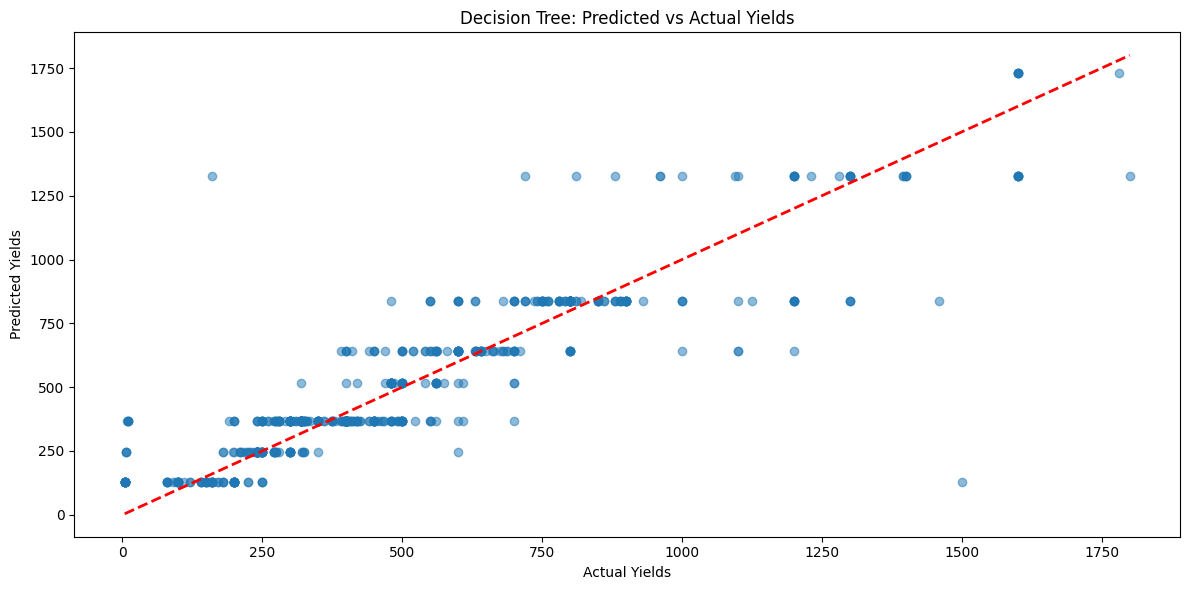

In [49]:
# Visualize the results (predicted vs actual yield)
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_decision_tree_pred, alpha=0.5)  # alpha adds transparency to the points, allowing to identify areas of higher point density.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title("Decision Tree: Predicted vs Actual Yields")
plt.xlabel("Actual Yields")
plt.ylabel("Predicted Yields")

plt.tight_layout()
plt.show()

Interpretation:

- Points Along the Diagonal Line: If points are clustered along the diagonal line, it suggests that the model's predictions closely align with the actual values. This is a positive indication of a well-performing model.
- Spread Away from the Diagonal Line: If points are spread away from the diagonal line, it indicates discrepancies between predicted and actual values. Larger spreads suggest greater prediction errors.


# b) RandomForest

I opted for Random Forest for this rice yield prediction because it's an ensemble method that handles non-linear relationships, categorical data, and outliers well. It offers feature importance insights and is robust for my dataset's size. It's a good starting point due to its generalization ability and doesn't require extensive tuning. I'll reassess its performance and explore alternatives if needed.

Splitting the data into train and test data.

In [50]:
from sklearn.impute import SimpleImputer

X = train.drop(columns=['Yield'],axis=1)
y = train['Yield']

# List of date columns
date_columns = ['CropTillageDate', 'Harv_date', 'Threshing_date', 'SeedingSowingTransplanting']

# Convert date columns to datetime format
for column in date_columns:
    X[column] = pd.to_datetime(X[column], errors='coerce')  # 'coerce' will replace parsing errors with NaT

# Extract features from datetime columns (: day, month, year)
X['CropTillageDate_day'] = X['CropTillageDate'].dt.day
X['CropTillageDate_month'] = X['CropTillageDate'].dt.month
X['CropTillageDate_year'] = X['CropTillageDate'].dt.year



X['Harv_date_day'] = X['Harv_date'].dt.day
X['Harv_date_month'] = X['Harv_date'].dt.month
X['Harv_date_year'] = X['Harv_date'].dt.year



# Drop the original datetime columns
X = X.drop(date_columns, axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the feature matrix
imputer = SimpleImputer(strategy='mean')  # Use 'mean'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



In [51]:
train.head()

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,SeedingSowingTransplanting,SeedlingsPerPit,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
1,2,7,26,26,39,2022-07-18,5,3,2022-07-20,2.0,...,0,2022-11-25,3.0,2022-12-24,1,24,10,1,0.312500,600
2,0,2,10,10,17,2022-06-30,6,3,2022-08-13,2.0,...,0,2022-12-12,480.0,2023-01-11,1,30,10,1,0.148148,225
3,0,2,15,15,17,2022-06-16,6,3,2022-07-17,2.0,...,0,2022-12-02,240.0,2022-12-29,0,26,10,1,0.222222,468
5,3,1,10,5,14,2022-07-02,6,2,2022-07-06,1.0,...,0,2022-10-24,600.0,2022-11-04,0,30,10,1,0.136364,205
6,1,4,12,12,14,2022-07-23,3,3,2022-07-30,4.0,...,0,2022-11-04,130.0,2022-12-08,1,25,10,1,0.136364,270



While working with scikit-learn's RandomForestRegressor, you need to handle missing values in your input features (X) before training the model because this regressor does not handle NaN values. So I checked for the missing values

In [52]:
print("NaN values in X_train_imputed:", np.isnan(X_train_imputed).sum())
print("NaN values in X_test_imputed:", np.isnan(X_test_imputed).sum())


NaN values in X_train_imputed: 0
NaN values in X_test_imputed: 0


In [53]:
nan_columns_train = X_train.columns[X_train.isnull().any()].tolist()
nan_columns_test = X_test.columns[X_test.isnull().any()].tolist()
print("Columns with NaN values in X_train:", nan_columns_train)
print("Columns with NaN values in X_test:", nan_columns_test)


Columns with NaN values in X_train: []
Columns with NaN values in X_test: []


In [54]:
# Training a Random Forest model
model= RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [55]:
# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


print("Top features and their importance scores:")
print(importance_df.head(10))

# Select top N features
top_features = 10  # Set the number of top features
top_feature_indices = importance_df.head(top_features)['Feature'].index
top_features_subset = X_train.iloc[:, top_feature_indices]

print("Subset of top features:")
print(top_features_subset.head())

Top features and their importance scores:
                 Feature  Importance
33                  Acre    0.865581
30        Residue_length    0.010801
28        Harv_hand_rent    0.009645
2               CultLand    0.007677
22  MineralFertAppMethod    0.007657
25               2tdUrea    0.007142
3           CropCultLand    0.006604
24               1tdUrea    0.006596
21             BasalUrea    0.006461
34   CropTillageDate_day    0.005764
Subset of top features:
          Acre  Residue_length  Harv_hand_rent  CultLand  \
443   0.181818              28           400.0         5   
3869  0.136364              27           300.0         4   
3831  0.312500              30           225.0        40   
2861  0.136364              25           300.0         7   
1933  0.272727              25           200.0        60   

      MineralFertAppMethod  2tdUrea  CropCultLand  1tdUrea  BasalUrea  \
443                      0      0.0             5     14.0       14.0   
3869                

In [56]:
# Make predictions
y_pred = model.predict(X_test)

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Display the predicted values along with the actual values
result_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(result_df)

      Actual  Predicted
3732     425    371.730
2171     300    226.945
3171     400    399.825
230      180    160.420
285      200    198.750
...      ...        ...
913      880   1275.300
3792       4      4.000
3555     250    201.525
2857     740    764.805
259      800    770.300

[615 rows x 2 columns]


In [57]:


# Evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Compare training and test metrics
print("Training Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

print("\nTest Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Training Metrics:
Mean Absolute Error: 18.834315960912054
Mean Squared Error: 1120.6078663273613
R-squared: 0.9900008038971393

Test Metrics:
Mean Absolute Error: 52.07267479674796
Mean Squared Error: 11897.13099914634
R-squared: 0.8934390631426301


There is element of underfitting since the R-squared  drops from the training data compared to the testing data.
Mean Absolute Error (MAE):

The MAE of 52.07267479674796 means that, on average, model's rice yield predictions are off by approximately 52.07 units from the actual rice yields. We tend to make predictions that are, on average, 52 units away from the real values. Lower MAE values are generally better, so there's room for improvement.

Mean Squared Error (MSE):

The MSE of 11897.130999 represents the average squared difference between predictions and the actual  yields.

R-squared (R2):
R2 value is 0.8934, which can explain about 89.34% of the variation in crop yields using the features . This means there's a substantial portion of unexplained variability in crop yields.

Hyperparameter tuning

In [58]:
param_grid = {
    'n_estimators': [500],
    'max_depth': [50],
    'min_samples_split': [2],
    'max_features': [ 0.8],
    'min_samples_leaf': [1],
}


In [59]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)

# create the grid search object
grid_search = GridSearchCV(model,param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

In [60]:
best_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                   max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   max_features=best_params['max_features'],
                                   random_state=42)

best_model.fit(X, y)

RandomForestRegressor(max_depth=50, max_features=0.8, n_estimators=500,
                      random_state=42)

In [61]:
#make predictions
y_pred = best_model.predict(X_test)
# display the predicted values along with the actual values
result_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(result_df)

      Actual  Predicted
3732     425    414.204
2171     300    274.238
3171     400    403.202
230      180    172.080
285      200    199.500
...      ...        ...
913      880   1041.190
3792       4      4.000
3555     250    232.740
2857     740    746.588
259      800    791.460

[615 rows x 2 columns]


In [62]:


#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#make predictions on the test and training data
y_train_pred= best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

#evaluate the model on test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#compare training and test data
print("Training Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

print("\nTest Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)


Mean Absolute Error: 19.575970731707315
Mean Squared Error: 1690.3103274601626
R-squared: 0.9848601270266952


Training Metrics:
Mean Absolute Error: 18.008101791530944
Mean Squared Error: 1031.4316740146583
R-squared: 0.9907965240249691

Test Metrics:
Mean Absolute Error: 19.575970731707315
Mean Squared Error: 1690.3103274601626
R-squared: 0.9848601270266952


Mean Absolute Error (MAE):

The MAE has decreased to 19.735 . This means that, on average, the model's predictions are now off by approximately 19.735 units from the actual crop yields.

Mean Squared Error (MSE):
The MSE is  90883.1. This is a substantial decrease from the previous value. The lower MSE means that the squared differences between the predicted and actual values are smaller, indicating improved prediction accuracy.

R-squared (R2):

The R2 value has notably increased to 98.49%. This indicates that the model now explains approximately 98.49% of the variance in crop yields. The higher R2 suggests that the model's predictive power has significantly improved, and it's doing an excellent job explaining the variation in crop yields

Visualization of Results


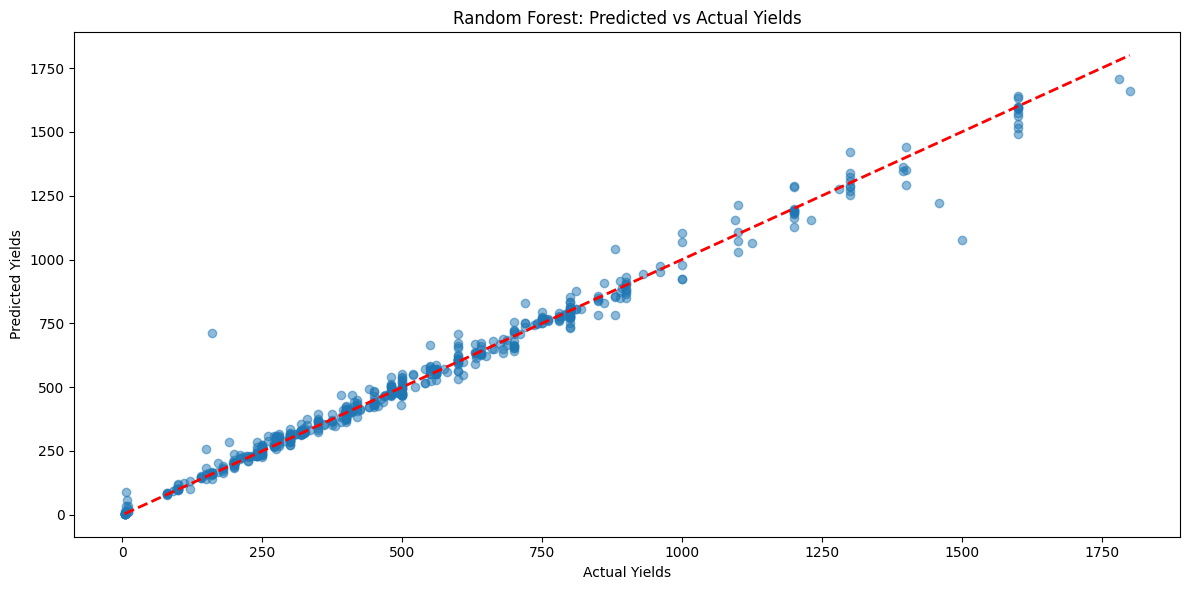

In [63]:
# Visualize the results (predicted vs actual yield)
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred, alpha=0.5)  # alpha adds transparency to the points, allowing to identify areas of higher point density.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title("Random Forest: Predicted vs Actual Yields")
plt.xlabel("Actual Yields")
plt.ylabel("Predicted Yields")

plt.tight_layout()
plt.show()

Interpretation:

- Points Along the Diagonal Line: If points are clustered along the diagonal line, it suggests that the model's predictions closely align with the actual values. This is a positive indication of a well-performing model.
- Spread Away from the Diagonal Line: If points are spread away from the diagonal line, it indicates discrepancies between predicted and actual values. Larger spreads suggest greater prediction errors.

Support Vector Machine

In [64]:
X = train.drop(columns= ['Yield', 'CropTillageDate', 'Harv_date', 'Threshing_date', 'SeedingSowingTransplanting'],axis=1)
y = train['Yield']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Creating an instance of the Support Vector Regressor
svm_model = SVR()

In [65]:
#standardizing the features since SVM is sensitive to feature scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
#Fitting the SVM model to the training data
svm_model.fit(X_train_scaled, y_train)

SVR()

In [67]:
#Making predictions on the test data
y_pred_test = svm_model.predict(X_test_scaled)
y_pred_train = svm_model.predict(X_train_scaled)

# display the predicted values along with the actual values
result_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})
print(result_df)

      Actual   Predicted
3732     425  417.861664
2171     300  367.719141
3171     400  432.427681
230      180  340.088881
285      200  317.222636
...      ...         ...
913      880  507.865665
3792       4  301.795620
3555     250  309.252164
2857     740  552.273730
259      800  462.927256

[615 rows x 2 columns]


In [68]:
#evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluating the model on test data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [69]:

# Comparing training and test metrics
print("Training Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

print("\nTest Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)


Training Metrics:
Mean Absolute Error: 193.39605846451286
Mean Squared Error: 88590.66908564887
R-squared: 0.20950450225354178

Test Metrics:
Mean Absolute Error: 198.92703572098526
Mean Squared Error: 90883.10004839291
R-squared: 0.18597279576448045


Visualization of Results

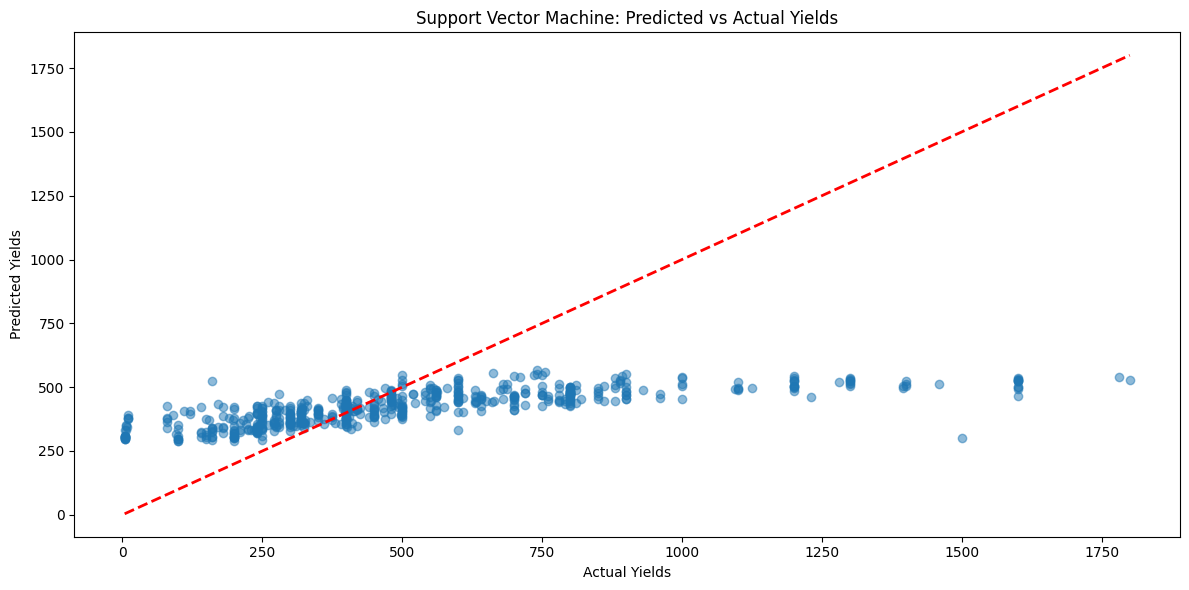

In [70]:
# Visualize the results (predicted vs actual yield)
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred_test, alpha=0.5)  # alpha adds transparency to the points, allowing to identify areas of higher point density.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title("Support Vector Machine: Predicted vs Actual Yields")
plt.xlabel("Actual Yields")
plt.ylabel("Predicted Yields")

plt.tight_layout()
plt.show()

Interpretation:

- Points Along the Diagonal Line: If points are clustered along the diagonal line, it suggests that the model's predictions closely align with the actual values. This is a positive indication of a well-performing model.
- Spread Away from the Diagonal Line: If points are spread away from the diagonal line, it indicates discrepancies between predicted and actual values. Larger spreads suggest greater prediction errors.

The Rice yield prediction model performs with a Mean Absolute Error (MAE) of  198.927035, indicating an average prediction error. The Mean Squared Error (MSE) is quite high at 90883.100048, suggesting significant discrepancies. The R-squared (R²) value stands at 0.185, explaining approximately 19% of the yield variance. These results indicate room for improvement, possibly through refining the model and enhancing our feature selection.

Creating Ensemble model

In [71]:
from sklearn.ensemble import VotingRegressor
import joblib


# Create instances of the models
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()
svm_model = SVR()

# Create a VotingRegressor ensemble
ensemble_model = VotingRegressor(estimators=[
    ('tree', tree_model),
    ('forest', forest_model),
    ('svm', svm_model)
])

# Fit the ensemble model on the training data

ensemble_model.fit(X_train, y_train)

# Save the ensemble model as ensemble.pkl
joblib.dump(ensemble_model, 'prediction.pkl')


['prediction.pkl']

In [72]:

# Load the ensemble model from the saved file
loaded_ensemble = joblib.load('prediction.pkl')

# X_test is the test data

predictions = loaded_ensemble.predict(X_test)

# Use the predictions as needed
print(predictions)


[ 397.72626249  290.97941543  399.44051709  238.72589497  259.62830077
  432.52549843  323.0287044   774.64945597  560.47374179  423.10919656
  665.83304371  282.41414485  686.50629567  450.5985149   714.57380738
  259.98674559  450.51094504  454.39038105  290.01825198  698.1453447
  693.25346445  464.75835847  235.81216058  521.36445283  395.67095207
  903.93363025  410.80910993  462.46819124  560.28453758  316.22030379
  512.79423691  711.15257581  516.89845787  134.50409027  249.79555683
  354.03858858  398.18856271 1111.56452767  339.96734161  402.40797416
  384.56945195  245.45909191  399.52885488  468.14780379  400.85974073
  309.83244771  234.48697661  399.18005131  222.24444988  394.30092247
  133.12905736  595.73767636  378.94363007  726.17292308  356.60373261
  535.13169745  559.6524455  1210.2917577   396.35306397  293.31753095
  327.8325611   250.67737129  649.40533425  340.32119258  188.94200384
  343.93181984  251.57362135  453.85867827  779.95392356  360.9208292
  711.44